# NGS pipeline for Alzheimer's Disease RNA-seq data

Pipeline to analyze RNA-seq data of an Alzheimer experiment. I have used 5 control samples and 5 Alzheimer samples.

In [2]:
import os
import pandas as pd
import csv
from IPython.display import FileLink
import matplotlib.pyplot as plt

%matplotlib inline

Initialize and setup some global variables:

In [3]:
# The git directory
os.environ['DIR'] = '/home/mees/NGS_Alzheimer/'
# Working directory to the sequencing data (I use an external disk, since I dont have a lot of space left on the pc)
os.environ['WORKDIR'] = '/media/mees/Elements/ngs_data/'
# The directory to the downloaded genome
os.environ['GENOMEDIR'] = '/media/mees/Elements/ngs_data/genomes/'
# Location to save the indexed reference genome
os.environ['REF_GENOME'] = '/media/mees/Elements/ngs_data/genomes/ref_genome/'
# FastQC perl file (without extension)
os.environ['FASTQC'] = '/home/mees/NGS/FastQC/fastqc'
# Hisat2-build file (without extension) or command
os.environ['HISAT_BUILD'] = '/home/mees/NGS_Alzheimer/hisat2-2.2.0/hisat2-build'
# Hisat2 file (without extension) or command
os.environ['HISAT'] = '/home/mees/NGS_Alzheimer/hisat2-2.2.0/hisat2'
# Samtools file (without extension) or command
os.environ['SAMTOOLS'] = 'samtools'

## Download Data

First download the human genome for reference and save it as genome.fa in $GENOMEDIR.

Second, download the human gene transfer file for feature counting as genome.gtf in $GENOMEDIR.

Third, download the sample data via SRA tools. This process is found in download_data.sh. This data is download in $WORKDIR.

In [ ]:
!wget ftp://ftp.ensembl.org/pub/release-100/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz
!gzip -d Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz
!mv Homo_sapiens.GRCh38.dna.primary_assembly.fa $GENOMEDIR/genome.fa

In [4]:
!wget ftp://ftp.ensembl.org/pub/release-100/gtf/homo_sapiens/Homo_sapiens.GRCh38.100.gtf.gz
!gzip -d Homo_sapiens.GRCh38.100.gtf.gz
!mv Homo_sapiens.GRCh38.100.gtf $GENOMEDIR/genome.gtf

--2020-06-25 12:35:33--  ftp://ftp.ensembl.org/pub/release-100/gtf/homo_sapiens/Homo_sapiens.GRCh38.100.gtf.gz
           => ‘Homo_sapiens.GRCh38.100.gtf.gz’
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/release-100/gtf/homo_sapiens ... done.
==> SIZE Homo_sapiens.GRCh38.100.gtf.gz ... 46973686
==> PASV ... done.    ==> RETR Homo_sapiens.GRCh38.100.gtf.gz ... done.
Length: 46973686 (45M) (unauthoritative)

Homo_sapiens.GRCh38 100%[===================>]  44,80M  13,6MB/s    in 3,3s    

2020-06-25 12:35:36 (13,4 MB/s) - ‘Homo_sapiens.GRCh38.100.gtf.gz’ saved [46973686]



In [4]:
!mkdir -p $WORKDIR
!./src/download_data.sh -d $WORKDIR


2020-06-29T10:11:16 prefetch.2.10.7 int: buffer insufficient while reading uri within cloud module - cannot Get Cloud Location
2020-06-29T10:11:17 prefetch.2.10.7: 1) 'SRR6145423' is found locally
2020-06-29T10:11:17 prefetch.2.10.7: 'SRR6145423' has 0 unresolved dependencies

2020-06-29T10:11:17 prefetch.2.10.7 int: buffer insufficient while reading uri within cloud module - cannot Get Cloud Location
2020-06-29T10:11:18 prefetch.2.10.7: 2) 'SRR6145424' is found locally
2020-06-29T10:11:18 prefetch.2.10.7: 'SRR6145424' has 0 unresolved dependencies

2020-06-29T10:11:18 prefetch.2.10.7 int: buffer insufficient while reading uri within cloud module - cannot Get Cloud Location
2020-06-29T10:11:19 prefetch.2.10.7: 3) 'SRR6145425' is found locally
2020-06-29T10:11:19 prefetch.2.10.7: 'SRR6145425' has 0 unresolved dependencies

2020-06-29T10:11:19 prefetch.2.10.7 int: buffer insufficient while reading uri within cloud module - cannot Get Cloud Location
2020-06-29T10:11:20 prefetch.2.10.7: 4

## Quality Control

The quality of the RNA-seq data is determined using FastQC, which creates HTML reports. The script that contains calls to FastQC is fastqc.sh.

U can specifiy -c to copy the final reports to another directory, for instance, I copy it to the git repository.

In [12]:
!mkdir -p data/FastQC

In [10]:
!./src/fastqc.sh -d $WORKDIR -l $FASTQC -c $DIR/data

Started analysis of SRR6145423.sra.fastq
Approx 5% complete for SRR6145423.sra.fastq
Approx 10% complete for SRR6145423.sra.fastq
Approx 15% complete for SRR6145423.sra.fastq
^C


In [12]:
for file in os.listdir('data/FastQC'):
    if file.endswith(".html"):
        html_file = FileLink(os.path.join('data/FastQC', file))
        display(html_file)

/home/mees/NGS_Alzheimer/data/FastQC/SRR6145434.sra_fastqc.html

/home/mees/NGS_Alzheimer/data/FastQC/SRR6145433.sra_fastqc.html

/home/mees/NGS_Alzheimer/data/FastQC/SRR6145425.sra_fastqc.html

/home/mees/NGS_Alzheimer/data/FastQC/SRR6145427.sra_fastqc.html

/home/mees/NGS_Alzheimer/data/FastQC/SRR6145426.sra_fastqc.html

/home/mees/NGS_Alzheimer/data/FastQC/SRR6145424.sra_fastqc.html

/home/mees/NGS_Alzheimer/data/FastQC/SRR6145435.sra_fastqc.html

/home/mees/NGS_Alzheimer/data/FastQC/SRR6145436.sra_fastqc.html

/home/mees/NGS_Alzheimer/data/FastQC/SRR6145423.sra_fastqc.html

/home/mees/NGS_Alzheimer/data/FastQC/SRR6145437.sra_fastqc.html

FastQC shows that there are Truseq adapter index 7 and NNNNNNN sequences.
We want to remove these sequences using cutadapt, however, this is still in progress at the bottom of this notebook.

## Alignment with Hisat2

First, hisat2 needs to build the reference genome using hisat2-build, which can be found in build.sh.

Then, the samples can be aligned using hisat2, which can be found in align.sh.

In [14]:
# Commented so I don't accidently run it again
#!./src/build.sh -g $GENOMEDIR/genome.fa -o $REF_GENOME -l $HISAT_BUILD

HISAT2 version 2.2.0 by Daehwan Kim (infphilo@gmail.com, http://www.ccb.jhu.edu/people/infphilo)
Usage: hisat2-build [options]* <reference_in> <ht2_index_base>
    reference_in            comma-separated list of files with ref sequences
    hisat2_index_base       write ht2 data to files with this dir/basename
Options:
    -c                      reference sequences given on cmd line (as
                            <reference_in>)
    --large-index           force generated index to be 'large', even if ref
                            has fewer than 4 billion nucleotides
    -a/--noauto             disable automatic -p/--bmax/--dcv memory-fitting
    -p <int>                number of threads
    --bmax <int>            max bucket sz for blockwise suffix-array builder
    --bmaxdivn <int>        max bucket sz as divisor of ref len (default: 4)
    --dcv <int>             diff-cover period for blockwise (default: 1024)
    --nodc                  disable diff-cover (algorithm becomes quad

In [23]:
!./src/align.sh -g $REF_GENOME -f $WORKDIR/ -l $HISAT

37552625 reads; of these:
  37552625 (100.00%) were unpaired; of these:
    2360539 (6.29%) aligned 0 times
    31238345 (83.19%) aligned exactly 1 time
    3953741 (10.53%) aligned >1 times
93.71% overall alignment rate
Hisat2 is aligning SRR6145423 to the reference genome.
38052606 reads; of these:
  38052606 (100.00%) were unpaired; of these:
    3423266 (9.00%) aligned 0 times
    28619217 (75.21%) aligned exactly 1 time
    6010123 (15.79%) aligned >1 times
91.00% overall alignment rate
Hisat2 is aligning SRR6145424 to the reference genome.
36212177 reads; of these:
  36212177 (100.00%) were unpaired; of these:
    2478081 (6.84%) aligned 0 times
    30107607 (83.14%) aligned exactly 1 time
    3626489 (10.01%) aligned >1 times
93.16% overall alignment rate
Hisat2 is aligning SRR6145425 to the reference genome.
42174836 reads; of these:
  42174836 (100.00%) were unpaired; of these:
    2849120 (6.76%) aligned 0 times
    34036585 (80.70%) aligned exactly 1 time
    5289131 (12.54%

## Converting .sam to .bam
In order to view the alignment in IGV and run HTSeq, the created sam files should processed, which is performed with samtools in samtobam.sh.

1. First, the files must be converted to bam files.
2. Second, the bam files must be sorted.
3. Third, the sorted bam files must be indexed.

In [22]:
!./src/samtobam.sh -d $WORKDIR -l $SAMTOOLS


Program: samtools (Tools for alignments in the SAM format)
Version: 1.10 (using htslib 1.10)

Usage:   samtools <command> [options]

Commands:
  -- Indexing
     dict           create a sequence dictionary file
     faidx          index/extract FASTA
     fqidx          index/extract FASTQ
     index          index alignment

  -- Editing
     calmd          recalculate MD/NM tags and '=' bases
     fixmate        fix mate information
     reheader       replace BAM header
     targetcut      cut fosmid regions (for fosmid pool only)
     addreplacerg   adds or replaces RG tags
     markdup        mark duplicates

  -- File operations
     collate        shuffle and group alignments by name
     cat            concatenate BAMs
     merge          merge sorted alignments
     mpileup        multi-way pileup
     sort           sort alignment file
     split          splits a file by read group
     quickcheck     quickly check if SAM/BAM/CRAM file appears intact
     fastq          con


Program: samtools (Tools for alignments in the SAM format)
Version: 1.10 (using htslib 1.10)

Usage:   samtools <command> [options]

Commands:
  -- Indexing
     dict           create a sequence dictionary file
     faidx          index/extract FASTA
     fqidx          index/extract FASTQ
     index          index alignment

  -- Editing
     calmd          recalculate MD/NM tags and '=' bases
     fixmate        fix mate information
     reheader       replace BAM header
     targetcut      cut fosmid regions (for fosmid pool only)
     addreplacerg   adds or replaces RG tags
     markdup        mark duplicates

  -- File operations
     collate        shuffle and group alignments by name
     cat            concatenate BAMs
     merge          merge sorted alignments
     mpileup        multi-way pileup
     sort           sort alignment file
     split          splits a file by read group
     quickcheck     quickly check if SAM/BAM/CRAM file appears intact
     fastq          con

# Counting Gene Features

Now that the alignment is finished, we count reads that are aligned to genes using HTSeq-count, which can be found in htseq.sh. In this script, it is specified that the alignments are ordered on position and that it is unstranded.

In [59]:
!./src/htseq.sh -d $WORKDIR -g $GENOMEDIR/genome.gtf

HTSeq is counting SRR6145423.sorted.bam.
100000 GFF lines processed.
200000 GFF lines processed.
300000 GFF lines processed.
400000 GFF lines processed.
500000 GFF lines processed.
600000 GFF lines processed.
700000 GFF lines processed.
800000 GFF lines processed.
900000 GFF lines processed.
1000000 GFF lines processed.
1100000 GFF lines processed.
1200000 GFF lines processed.
1300000 GFF lines processed.
1400000 GFF lines processed.
1500000 GFF lines processed.
1600000 GFF lines processed.
1700000 GFF lines processed.
1800000 GFF lines processed.
1900000 GFF lines processed.
2000000 GFF lines processed.
2100000 GFF lines processed.
2200000 GFF lines processed.
2300000 GFF lines processed.
2400000 GFF lines processed.
2500000 GFF lines processed.
2600000 GFF lines processed.
2700000 GFF lines processed.
2800000 GFF lines processed.
2900000 GFF lines processed.
2908224 GFF lines processed.
100000 SAM alignment records processed.
200000 SAM alignment records processed.
300000 SAM alignme

17800000 SAM alignment records processed.
17900000 SAM alignment records processed.
18000000 SAM alignment records processed.
18100000 SAM alignment records processed.
18200000 SAM alignment records processed.
18300000 SAM alignment records processed.
18400000 SAM alignment records processed.
18500000 SAM alignment records processed.
18600000 SAM alignment records processed.
18700000 SAM alignment records processed.
18800000 SAM alignment records processed.
18900000 SAM alignment records processed.
19000000 SAM alignment records processed.
19100000 SAM alignment records processed.
19200000 SAM alignment records processed.
19300000 SAM alignment records processed.
19400000 SAM alignment records processed.
19500000 SAM alignment records processed.
19600000 SAM alignment records processed.
19700000 SAM alignment records processed.
19800000 SAM alignment records processed.
19900000 SAM alignment records processed.
20000000 SAM alignment records processed.
20100000 SAM alignment records pro

37400000 SAM alignment records processed.
37500000 SAM alignment records processed.
37600000 SAM alignment records processed.
37700000 SAM alignment records processed.
37800000 SAM alignment records processed.
37900000 SAM alignment records processed.
38000000 SAM alignment records processed.
38100000 SAM alignment records processed.
38200000 SAM alignment records processed.
38300000 SAM alignment records processed.
38400000 SAM alignment records processed.
38500000 SAM alignment records processed.
38600000 SAM alignment records processed.
38700000 SAM alignment records processed.
38800000 SAM alignment records processed.
38900000 SAM alignment records processed.
39000000 SAM alignment records processed.
39100000 SAM alignment records processed.
39200000 SAM alignment records processed.
39300000 SAM alignment records processed.
39400000 SAM alignment records processed.
39500000 SAM alignment records processed.
39600000 SAM alignment records processed.
39700000 SAM alignment records pro

7500000 SAM alignment records processed.
7600000 SAM alignment records processed.
7700000 SAM alignment records processed.
7800000 SAM alignment records processed.
7900000 SAM alignment records processed.
8000000 SAM alignment records processed.
8100000 SAM alignment records processed.
8200000 SAM alignment records processed.
8300000 SAM alignment records processed.
8400000 SAM alignment records processed.
8500000 SAM alignment records processed.
8600000 SAM alignment records processed.
8700000 SAM alignment records processed.
8800000 SAM alignment records processed.
8900000 SAM alignment records processed.
9000000 SAM alignment records processed.
9100000 SAM alignment records processed.
9200000 SAM alignment records processed.
9300000 SAM alignment records processed.
9400000 SAM alignment records processed.
9500000 SAM alignment records processed.
9600000 SAM alignment records processed.
9700000 SAM alignment records processed.
9800000 SAM alignment records processed.
9900000 SAM alig

27100000 SAM alignment records processed.
27200000 SAM alignment records processed.
27300000 SAM alignment records processed.
27400000 SAM alignment records processed.
27500000 SAM alignment records processed.
27600000 SAM alignment records processed.
27700000 SAM alignment records processed.
27800000 SAM alignment records processed.
27900000 SAM alignment records processed.
28000000 SAM alignment records processed.
28100000 SAM alignment records processed.
28200000 SAM alignment records processed.
28300000 SAM alignment records processed.
28400000 SAM alignment records processed.
28500000 SAM alignment records processed.
28600000 SAM alignment records processed.
28700000 SAM alignment records processed.
28800000 SAM alignment records processed.
28900000 SAM alignment records processed.
29000000 SAM alignment records processed.
29100000 SAM alignment records processed.
29200000 SAM alignment records processed.
29300000 SAM alignment records processed.
29400000 SAM alignment records pro

46700000 SAM alignment records processed.
46800000 SAM alignment records processed.
46900000 SAM alignment records processed.
47000000 SAM alignment records processed.
47100000 SAM alignment records processed.
47200000 SAM alignment records processed.
47300000 SAM alignment records processed.
47400000 SAM alignment records processed.
47500000 SAM alignment records processed.
47600000 SAM alignment records processed.
47700000 SAM alignment records processed.
47800000 SAM alignment records processed.
47900000 SAM alignment records processed.
48000000 SAM alignment records processed.
48100000 SAM alignment records processed.
48200000 SAM alignment records processed.
48300000 SAM alignment records processed.
48400000 SAM alignment records processed.
48500000 SAM alignment records processed.
48600000 SAM alignment records processed.
48700000 SAM alignment records processed.
48800000 SAM alignment records processed.
48900000 SAM alignment records processed.
49000000 SAM alignment records pro

8700000 SAM alignment records processed.
8800000 SAM alignment records processed.
8900000 SAM alignment records processed.
9000000 SAM alignment records processed.
9100000 SAM alignment records processed.
9200000 SAM alignment records processed.
9300000 SAM alignment records processed.
9400000 SAM alignment records processed.
9500000 SAM alignment records processed.
9600000 SAM alignment records processed.
9700000 SAM alignment records processed.
9800000 SAM alignment records processed.
9900000 SAM alignment records processed.
10000000 SAM alignment records processed.
10100000 SAM alignment records processed.
10200000 SAM alignment records processed.
10300000 SAM alignment records processed.
10400000 SAM alignment records processed.
10500000 SAM alignment records processed.
10600000 SAM alignment records processed.
10700000 SAM alignment records processed.
10800000 SAM alignment records processed.
10900000 SAM alignment records processed.
11000000 SAM alignment records processed.
11100

28300000 SAM alignment records processed.
28400000 SAM alignment records processed.
28500000 SAM alignment records processed.
28600000 SAM alignment records processed.
28700000 SAM alignment records processed.
28800000 SAM alignment records processed.
28900000 SAM alignment records processed.
29000000 SAM alignment records processed.
29100000 SAM alignment records processed.
29200000 SAM alignment records processed.
29300000 SAM alignment records processed.
29400000 SAM alignment records processed.
29500000 SAM alignment records processed.
29600000 SAM alignment records processed.
29700000 SAM alignment records processed.
29800000 SAM alignment records processed.
29900000 SAM alignment records processed.
30000000 SAM alignment records processed.
30100000 SAM alignment records processed.
30200000 SAM alignment records processed.
30300000 SAM alignment records processed.
30400000 SAM alignment records processed.
30500000 SAM alignment records processed.
30600000 SAM alignment records pro

800000 SAM alignment records processed.
900000 SAM alignment records processed.
1000000 SAM alignment records processed.
1100000 SAM alignment records processed.
1200000 SAM alignment records processed.
1300000 SAM alignment records processed.
1400000 SAM alignment records processed.
1500000 SAM alignment records processed.
1600000 SAM alignment records processed.
1700000 SAM alignment records processed.
1800000 SAM alignment records processed.
1900000 SAM alignment records processed.
2000000 SAM alignment records processed.
2100000 SAM alignment records processed.
2200000 SAM alignment records processed.
2300000 SAM alignment records processed.
2400000 SAM alignment records processed.
2500000 SAM alignment records processed.
2600000 SAM alignment records processed.
2700000 SAM alignment records processed.
2800000 SAM alignment records processed.
2900000 SAM alignment records processed.
3000000 SAM alignment records processed.
3100000 SAM alignment records processed.
3200000 SAM alignm

20600000 SAM alignment records processed.
20700000 SAM alignment records processed.
20800000 SAM alignment records processed.
20900000 SAM alignment records processed.
21000000 SAM alignment records processed.
21100000 SAM alignment records processed.
21200000 SAM alignment records processed.
21300000 SAM alignment records processed.
21400000 SAM alignment records processed.
21500000 SAM alignment records processed.
21600000 SAM alignment records processed.
21700000 SAM alignment records processed.
21800000 SAM alignment records processed.
21900000 SAM alignment records processed.
22000000 SAM alignment records processed.
22100000 SAM alignment records processed.
22200000 SAM alignment records processed.
22300000 SAM alignment records processed.
22400000 SAM alignment records processed.
22500000 SAM alignment records processed.
22600000 SAM alignment records processed.
22700000 SAM alignment records processed.
22800000 SAM alignment records processed.
22900000 SAM alignment records pro

40200000 SAM alignment records processed.
40300000 SAM alignment records processed.
40400000 SAM alignment records processed.
40500000 SAM alignment records processed.
40600000 SAM alignment records processed.
40700000 SAM alignment records processed.
40800000 SAM alignment records processed.
40900000 SAM alignment records processed.
41000000 SAM alignment records processed.
41100000 SAM alignment records processed.
41200000 SAM alignment records processed.
41300000 SAM alignment records processed.
41400000 SAM alignment records processed.
41500000 SAM alignment records processed.
41600000 SAM alignment records processed.
41700000 SAM alignment records processed.
41800000 SAM alignment records processed.
41900000 SAM alignment records processed.
42000000 SAM alignment records processed.
42100000 SAM alignment records processed.
42200000 SAM alignment records processed.
42300000 SAM alignment records processed.
42400000 SAM alignment records processed.
42500000 SAM alignment records pro

1600000 SAM alignment records processed.
1700000 SAM alignment records processed.
1800000 SAM alignment records processed.
1900000 SAM alignment records processed.
2000000 SAM alignment records processed.
2100000 SAM alignment records processed.
2200000 SAM alignment records processed.
2300000 SAM alignment records processed.
2400000 SAM alignment records processed.
2500000 SAM alignment records processed.
2600000 SAM alignment records processed.
2700000 SAM alignment records processed.
2800000 SAM alignment records processed.
2900000 SAM alignment records processed.
3000000 SAM alignment records processed.
3100000 SAM alignment records processed.
3200000 SAM alignment records processed.
3300000 SAM alignment records processed.
3400000 SAM alignment records processed.
3500000 SAM alignment records processed.
3600000 SAM alignment records processed.
3700000 SAM alignment records processed.
3800000 SAM alignment records processed.
3900000 SAM alignment records processed.
4000000 SAM alig

21400000 SAM alignment records processed.
21500000 SAM alignment records processed.
21600000 SAM alignment records processed.
21700000 SAM alignment records processed.
21800000 SAM alignment records processed.
21900000 SAM alignment records processed.
22000000 SAM alignment records processed.
22100000 SAM alignment records processed.
22200000 SAM alignment records processed.
22300000 SAM alignment records processed.
22400000 SAM alignment records processed.
22500000 SAM alignment records processed.
22600000 SAM alignment records processed.
22700000 SAM alignment records processed.
22800000 SAM alignment records processed.
22900000 SAM alignment records processed.
23000000 SAM alignment records processed.
23100000 SAM alignment records processed.
23200000 SAM alignment records processed.
23300000 SAM alignment records processed.
23400000 SAM alignment records processed.
23500000 SAM alignment records processed.
23600000 SAM alignment records processed.
23700000 SAM alignment records pro

41000000 SAM alignment records processed.
41100000 SAM alignment records processed.
41200000 SAM alignment records processed.
41300000 SAM alignment records processed.
41400000 SAM alignment records processed.
41500000 SAM alignment records processed.
41600000 SAM alignment records processed.
41700000 SAM alignment records processed.
41800000 SAM alignment records processed.
41900000 SAM alignment records processed.
42000000 SAM alignment records processed.
42100000 SAM alignment records processed.
42200000 SAM alignment records processed.
42300000 SAM alignment records processed.
42400000 SAM alignment records processed.
42500000 SAM alignment records processed.
42600000 SAM alignment records processed.
42700000 SAM alignment records processed.
42800000 SAM alignment records processed.
42900000 SAM alignment records processed.
43000000 SAM alignment records processed.
43100000 SAM alignment records processed.
43200000 SAM alignment records processed.
43300000 SAM alignment records pro

5600000 SAM alignment records processed.
5700000 SAM alignment records processed.
5800000 SAM alignment records processed.
5900000 SAM alignment records processed.
6000000 SAM alignment records processed.
6100000 SAM alignment records processed.
6200000 SAM alignment records processed.
6300000 SAM alignment records processed.
6400000 SAM alignment records processed.
6500000 SAM alignment records processed.
6600000 SAM alignment records processed.
6700000 SAM alignment records processed.
6800000 SAM alignment records processed.
6900000 SAM alignment records processed.
7000000 SAM alignment records processed.
7100000 SAM alignment records processed.
7200000 SAM alignment records processed.
7300000 SAM alignment records processed.
7400000 SAM alignment records processed.
7500000 SAM alignment records processed.
7600000 SAM alignment records processed.
7700000 SAM alignment records processed.
7800000 SAM alignment records processed.
7900000 SAM alignment records processed.
8000000 SAM alig

25300000 SAM alignment records processed.
25400000 SAM alignment records processed.
25500000 SAM alignment records processed.
25600000 SAM alignment records processed.
25700000 SAM alignment records processed.
25800000 SAM alignment records processed.
25900000 SAM alignment records processed.
26000000 SAM alignment records processed.
26100000 SAM alignment records processed.
26200000 SAM alignment records processed.
26300000 SAM alignment records processed.
26400000 SAM alignment records processed.
26500000 SAM alignment records processed.
26600000 SAM alignment records processed.
26700000 SAM alignment records processed.
26800000 SAM alignment records processed.
26900000 SAM alignment records processed.
27000000 SAM alignment records processed.
27100000 SAM alignment records processed.
27200000 SAM alignment records processed.
27300000 SAM alignment records processed.
27400000 SAM alignment records processed.
27500000 SAM alignment records processed.
27600000 SAM alignment records pro

44900000 SAM alignment records processed.
45000000 SAM alignment records processed.
45100000 SAM alignment records processed.
45200000 SAM alignment records processed.
45300000 SAM alignment records processed.
45400000 SAM alignment records processed.
45500000 SAM alignment records processed.
45600000 SAM alignment records processed.
45700000 SAM alignment records processed.
45800000 SAM alignment records processed.
45900000 SAM alignment records processed.
46000000 SAM alignment records processed.
46100000 SAM alignment records processed.
46200000 SAM alignment records processed.
46300000 SAM alignment records processed.
46400000 SAM alignment records processed.
46500000 SAM alignment records processed.
46600000 SAM alignment records processed.
46700000 SAM alignment records processed.
46800000 SAM alignment records processed.
46900000 SAM alignment records processed.
47000000 SAM alignment records processed.
47100000 SAM alignment records processed.
47200000 SAM alignment records pro

64500000 SAM alignment records processed.
64600000 SAM alignment records processed.
64700000 SAM alignment records processed.
64800000 SAM alignment records processed.
64900000 SAM alignment records processed.
65000000 SAM alignment records processed.
65100000 SAM alignment records processed.
65200000 SAM alignment records processed.
65300000 SAM alignment records processed.
65400000 SAM alignment records processed.
65500000 SAM alignment records processed.
65600000 SAM alignment records processed.
65700000 SAM alignment records processed.
65800000 SAM alignment records processed.
65900000 SAM alignment records processed.
66000000 SAM alignment records processed.
66100000 SAM alignment records processed.
66200000 SAM alignment records processed.
66300000 SAM alignment records processed.
66400000 SAM alignment records processed.
66500000 SAM alignment records processed.
66600000 SAM alignment records processed.
66700000 SAM alignment records processed.
66800000 SAM alignment records pro

8100000 SAM alignment records processed.
8200000 SAM alignment records processed.
8300000 SAM alignment records processed.
8400000 SAM alignment records processed.
8500000 SAM alignment records processed.
8600000 SAM alignment records processed.
8700000 SAM alignment records processed.
8800000 SAM alignment records processed.
8900000 SAM alignment records processed.
9000000 SAM alignment records processed.
9100000 SAM alignment records processed.
9200000 SAM alignment records processed.
9300000 SAM alignment records processed.
9400000 SAM alignment records processed.
9500000 SAM alignment records processed.
9600000 SAM alignment records processed.
9700000 SAM alignment records processed.
9800000 SAM alignment records processed.
9900000 SAM alignment records processed.
10000000 SAM alignment records processed.
10100000 SAM alignment records processed.
10200000 SAM alignment records processed.
10300000 SAM alignment records processed.
10400000 SAM alignment records processed.
10500000 SA

27700000 SAM alignment records processed.
27800000 SAM alignment records processed.
27900000 SAM alignment records processed.
28000000 SAM alignment records processed.
28100000 SAM alignment records processed.
28200000 SAM alignment records processed.
28300000 SAM alignment records processed.
28400000 SAM alignment records processed.
28500000 SAM alignment records processed.
28600000 SAM alignment records processed.
28700000 SAM alignment records processed.
28800000 SAM alignment records processed.
28900000 SAM alignment records processed.
29000000 SAM alignment records processed.
29100000 SAM alignment records processed.
29200000 SAM alignment records processed.
29300000 SAM alignment records processed.
29400000 SAM alignment records processed.
29500000 SAM alignment records processed.
29600000 SAM alignment records processed.
29700000 SAM alignment records processed.
29800000 SAM alignment records processed.
29900000 SAM alignment records processed.
30000000 SAM alignment records pro

47300000 SAM alignment records processed.
47400000 SAM alignment records processed.
47500000 SAM alignment records processed.
47600000 SAM alignment records processed.
47700000 SAM alignment records processed.
47800000 SAM alignment records processed.
47900000 SAM alignment records processed.
48000000 SAM alignment records processed.
48100000 SAM alignment records processed.
48200000 SAM alignment records processed.
48300000 SAM alignment records processed.
48400000 SAM alignment records processed.
48500000 SAM alignment records processed.
48600000 SAM alignment records processed.
48700000 SAM alignment records processed.
48800000 SAM alignment records processed.
48900000 SAM alignment records processed.
49000000 SAM alignment records processed.
49100000 SAM alignment records processed.
49200000 SAM alignment records processed.
49300000 SAM alignment records processed.
49400000 SAM alignment records processed.
49500000 SAM alignment records processed.
49600000 SAM alignment records pro

66900000 SAM alignment records processed.
67000000 SAM alignment records processed.
67100000 SAM alignment records processed.
67200000 SAM alignment records processed.
67300000 SAM alignment records processed.
67400000 SAM alignment records processed.
67500000 SAM alignment records processed.
67600000 SAM alignment records processed.
67700000 SAM alignment records processed.
67800000 SAM alignment records processed.
67900000 SAM alignment records processed.
68000000 SAM alignment records processed.
68100000 SAM alignment records processed.
68200000 SAM alignment records processed.
68300000 SAM alignment records processed.
68400000 SAM alignment records processed.
68500000 SAM alignment records processed.
68600000 SAM alignment records processed.
68700000 SAM alignment records processed.
68800000 SAM alignment records processed.
68900000 SAM alignment records processed.
69000000 SAM alignment records processed.
69100000 SAM alignment records processed.
69200000 SAM alignment records pro

12200000 SAM alignment records processed.
12300000 SAM alignment records processed.
12400000 SAM alignment records processed.
12500000 SAM alignment records processed.
12600000 SAM alignment records processed.
12700000 SAM alignment records processed.
12800000 SAM alignment records processed.
12900000 SAM alignment records processed.
13000000 SAM alignment records processed.
13100000 SAM alignment records processed.
13200000 SAM alignment records processed.
13300000 SAM alignment records processed.
13400000 SAM alignment records processed.
13500000 SAM alignment records processed.
13600000 SAM alignment records processed.
13700000 SAM alignment records processed.
13800000 SAM alignment records processed.
13900000 SAM alignment records processed.
14000000 SAM alignment records processed.
14100000 SAM alignment records processed.
14200000 SAM alignment records processed.
14300000 SAM alignment records processed.
14400000 SAM alignment records processed.
14500000 SAM alignment records pro

31800000 SAM alignment records processed.
31900000 SAM alignment records processed.
32000000 SAM alignment records processed.
32100000 SAM alignment records processed.
32200000 SAM alignment records processed.
32300000 SAM alignment records processed.
32400000 SAM alignment records processed.
32500000 SAM alignment records processed.
32600000 SAM alignment records processed.
32700000 SAM alignment records processed.
32800000 SAM alignment records processed.
32900000 SAM alignment records processed.
33000000 SAM alignment records processed.
33100000 SAM alignment records processed.
33200000 SAM alignment records processed.
33300000 SAM alignment records processed.
33400000 SAM alignment records processed.
33500000 SAM alignment records processed.
33600000 SAM alignment records processed.
33700000 SAM alignment records processed.
33800000 SAM alignment records processed.
33900000 SAM alignment records processed.
34000000 SAM alignment records processed.
34100000 SAM alignment records pro

800000 GFF lines processed.
900000 GFF lines processed.
1000000 GFF lines processed.
1100000 GFF lines processed.
1200000 GFF lines processed.
1300000 GFF lines processed.
1400000 GFF lines processed.
1500000 GFF lines processed.
1600000 GFF lines processed.
1700000 GFF lines processed.
1800000 GFF lines processed.
1900000 GFF lines processed.
2000000 GFF lines processed.
2100000 GFF lines processed.
2200000 GFF lines processed.
2300000 GFF lines processed.
2400000 GFF lines processed.
2500000 GFF lines processed.
2600000 GFF lines processed.
2700000 GFF lines processed.
2800000 GFF lines processed.
2900000 GFF lines processed.
2908224 GFF lines processed.
100000 SAM alignment records processed.
200000 SAM alignment records processed.
300000 SAM alignment records processed.
400000 SAM alignment records processed.
500000 SAM alignment records processed.
600000 SAM alignment records processed.
700000 SAM alignment records processed.
800000 SAM alignment records processed.
900000 SAM alig

18300000 SAM alignment records processed.
18400000 SAM alignment records processed.
18500000 SAM alignment records processed.
18600000 SAM alignment records processed.
18700000 SAM alignment records processed.
18800000 SAM alignment records processed.
18900000 SAM alignment records processed.
19000000 SAM alignment records processed.
19100000 SAM alignment records processed.
19200000 SAM alignment records processed.
19300000 SAM alignment records processed.
19400000 SAM alignment records processed.
19500000 SAM alignment records processed.
19600000 SAM alignment records processed.
19700000 SAM alignment records processed.
19800000 SAM alignment records processed.
19900000 SAM alignment records processed.
20000000 SAM alignment records processed.
20100000 SAM alignment records processed.
20200000 SAM alignment records processed.
20300000 SAM alignment records processed.
20400000 SAM alignment records processed.
20500000 SAM alignment records processed.
20600000 SAM alignment records pro

37900000 SAM alignment records processed.
38000000 SAM alignment records processed.
38100000 SAM alignment records processed.
38200000 SAM alignment records processed.
38300000 SAM alignment records processed.
38400000 SAM alignment records processed.
38500000 SAM alignment records processed.
38600000 SAM alignment records processed.
38700000 SAM alignment records processed.
38800000 SAM alignment records processed.
38900000 SAM alignment records processed.
39000000 SAM alignment records processed.
39100000 SAM alignment records processed.
39200000 SAM alignment records processed.
39300000 SAM alignment records processed.
39400000 SAM alignment records processed.
39500000 SAM alignment records processed.
39600000 SAM alignment records processed.
39700000 SAM alignment records processed.
39800000 SAM alignment records processed.
39900000 SAM alignment records processed.
40000000 SAM alignment records processed.
40100000 SAM alignment records processed.
40200000 SAM alignment records pro

6800000 SAM alignment records processed.
6900000 SAM alignment records processed.
7000000 SAM alignment records processed.
7100000 SAM alignment records processed.
7200000 SAM alignment records processed.
7300000 SAM alignment records processed.
7400000 SAM alignment records processed.
7500000 SAM alignment records processed.
7600000 SAM alignment records processed.
7700000 SAM alignment records processed.
7800000 SAM alignment records processed.
7900000 SAM alignment records processed.
8000000 SAM alignment records processed.
8100000 SAM alignment records processed.
8200000 SAM alignment records processed.
8300000 SAM alignment records processed.
8400000 SAM alignment records processed.
8500000 SAM alignment records processed.
8600000 SAM alignment records processed.
8700000 SAM alignment records processed.
8800000 SAM alignment records processed.
8900000 SAM alignment records processed.
9000000 SAM alignment records processed.
9100000 SAM alignment records processed.
9200000 SAM alig

26400000 SAM alignment records processed.
26500000 SAM alignment records processed.
26600000 SAM alignment records processed.
26700000 SAM alignment records processed.
26800000 SAM alignment records processed.
26900000 SAM alignment records processed.
27000000 SAM alignment records processed.
27100000 SAM alignment records processed.
27200000 SAM alignment records processed.
27300000 SAM alignment records processed.
27400000 SAM alignment records processed.
27500000 SAM alignment records processed.
27600000 SAM alignment records processed.
27700000 SAM alignment records processed.
27800000 SAM alignment records processed.
27900000 SAM alignment records processed.
28000000 SAM alignment records processed.
28100000 SAM alignment records processed.
28200000 SAM alignment records processed.
28300000 SAM alignment records processed.
28400000 SAM alignment records processed.
28500000 SAM alignment records processed.
28600000 SAM alignment records processed.
28700000 SAM alignment records pro

46000000 SAM alignment records processed.
46100000 SAM alignment records processed.
46200000 SAM alignment records processed.
46300000 SAM alignment records processed.
46400000 SAM alignment records processed.
46500000 SAM alignment records processed.
46600000 SAM alignment records processed.
46700000 SAM alignment records processed.
46800000 SAM alignment records processed.
46900000 SAM alignment records processed.
47000000 SAM alignment records processed.
47100000 SAM alignment records processed.
47200000 SAM alignment records processed.
47300000 SAM alignment records processed.
47400000 SAM alignment records processed.
47500000 SAM alignment records processed.
47600000 SAM alignment records processed.
47700000 SAM alignment records processed.
47800000 SAM alignment records processed.
47900000 SAM alignment records processed.
48000000 SAM alignment records processed.
48100000 SAM alignment records processed.
48200000 SAM alignment records processed.
48300000 SAM alignment records pro

## Differential Expression Using DESeq2

Now let us use DESeq2 to determine the differential expression.

First, make a file containing all the necessary information for running DESeq2.

Then, the R-script (DESeq2.r) can be executed.

In [83]:
# Directory where the alignment etc. data is stored
workdir = os.environ['WORKDIR']

# Location the the file with the metadata
metadata = 'metadata.txt'
        
df = pandas.read_csv(metadata, sep=',')


# Create a dictionary containing the necessary information
file_info = {}

# Adding HTSeq data to the dictionary
for file in os.listdir(workdir):
    split = file.split('.')
    if len(split) == 1 and split[0].startswith('SRR'):
        condition = df[df['Run'] == split[0]]['study_group'].values[0]
        file_info[split[0]] = {}
        file_info[split[0]]['HTSeq'] = os.path.join(workdir, split[0], 'Hisat2/' + split[0] + '_HTScount.txt')
        file_info[split[0]]['condition'] = condition.replace(', ', '_')
        
# Write data to a csv file      
file_out = 'DESeq2_data_table.csv'
with open(file_out, 'w') as f:
    f.write('SRR,HTSeq,condition')
    
    for key in file_info.keys():
        f.write("\n" + key + ',' + file_info[key]['HTSeq'] + ',' + file_info[key]['condition'])

In [97]:
!mkdir -p $WORKDIR/DESeq
!R < ./src/DESeq2.r --no-save
!cp -p $WORKDIR/DESeq/output.csv $DIR/data/DESeq_output.csv
!cp -p $WORKDIR/DESeq/output_LFC.csv $DIR/data/DESeq_LFC_output.csv


R version 4.0.1 (2020-06-06) -- "See Things Now"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> # Script that analyzes the differential expression of the samples with DESeq2
> 
> # Import the library
> library("DESeq2")
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The f

## Analyze the Data (in progress)
Lastly, analyze the data!

In [12]:
df = pd.read_csv('data/DESeq_output.csv', index_col=0)
df = df.sort_values(by='pvalue', ascending=True)

MD Plot

In [23]:
def MD_plot(mean, foldChange, y_lim, x_lim):
    
    plt.scatter(mean, foldChange)
    plt.ylim(y_lim)
    plt.xlim(x_lim)

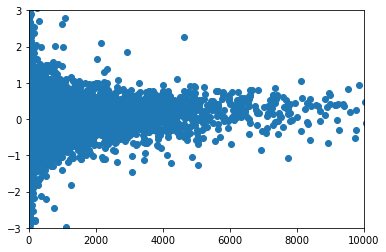

In [24]:
mean = df['baseMean'].to_numpy()
foldChange = df['log2FoldChange'].to_numpy()
MD_plot(mean, foldChange, (-3,3), (0, 10000))

## Cutting Adapters (testing)

In [43]:
#!./src/trim.sh -d $WORKDIR

This is cutadapt 1.15 with Python 3.6.9
Command line parameters: -a NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN -a GATCGGAAGAGCACACGTCTGAACTCCAGTCACGAGATTCCATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAA -a GATCGGAAGAGCACACGTCTGAACTCCAGTCACGAGATTCCATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAAT -o trimmed/SRR6145423.sra.fastq SRR6145423.sra.fastq
Running on 1 core
Trimming 3 adapters with at most 10.0% errors in single-end mode ...
Finished in 1383.31 s (37 us/read; 1.63 M reads/minute).

=== Summary ===

Total reads processed:              37,552,625
Reads with adapters:                37,332,522 (99.4%)
Reads written (passing filters):    37,552,625 (100.0%)

Total basepairs processed: 2,785,289,949 bp
Total written (filtered):      7,860,791 bp (0.3%)

=== Adapter 1 ===

Sequence: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN; Type: regular 3'; Length: 35; Trimmed: 36966506 times.

No. of allowed errors:
0-9 bp: 0; 10-19 bp: 1; 20-29 bp: 2; 30-35 bp: 3

Bases preceding removed adapters:
  A: 0.0%
  C: 0.0%
  G: 0.0%
  T: 0.0%


FastQC analysis after trimming the adapters.

In [44]:
#!./src/fastqc.sh -d $WORKDIR/trimmed/

Started analysis of SRR6145423.sra.fastq
Approx 5% complete for SRR6145423.sra.fastq
Approx 10% complete for SRR6145423.sra.fastq
Approx 15% complete for SRR6145423.sra.fastq
Approx 20% complete for SRR6145423.sra.fastq
Approx 25% complete for SRR6145423.sra.fastq
Approx 30% complete for SRR6145423.sra.fastq
Approx 35% complete for SRR6145423.sra.fastq
Approx 40% complete for SRR6145423.sra.fastq
Approx 45% complete for SRR6145423.sra.fastq
Approx 50% complete for SRR6145423.sra.fastq
Approx 55% complete for SRR6145423.sra.fastq
Approx 60% complete for SRR6145423.sra.fastq
Approx 65% complete for SRR6145423.sra.fastq
Approx 70% complete for SRR6145423.sra.fastq
Approx 75% complete for SRR6145423.sra.fastq
Approx 80% complete for SRR6145423.sra.fastq
Approx 85% complete for SRR6145423.sra.fastq
Approx 90% complete for SRR6145423.sra.fastq
Approx 95% complete for SRR6145423.sra.fastq
Analysis complete for SRR6145423.sra.fastq
Started analysis of SRR6145433.sra.fastq
Approx 5% complete fo

Then align with trimming.

In [47]:
#!./src/align.sh -g $REF_GENOME -f $WORKDIR/trimmed/

Hisat2 is aligning SRR6145423.sra.fastq
--read-lengths arg must be at least 20
HISAT2 version 2.2.0 by Daehwan Kim (infphilo@gmail.com, www.ccb.jhu.edu/people/infphilo)
Usage: 
  hisat2 [options]* -x <ht2-idx> {-1 <m1> -2 <m2> | -U <r> | --sra-acc <SRA accession number>} [-S <sam>]

  <ht2-idx>  Index filename prefix (minus trailing .X.ht2).
  <m1>       Files with #1 mates, paired with files in <m2>.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <m2>       Files with #2 mates, paired with files in <m1>.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <r>        Files with unpaired reads.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <SRA accession number>        Comma-separated list of SRA accession numbers, e.g. --sra-acc SRR353653,SRR353654.
  <sam>      File for SAM output (default: stdout)

  <m1>, <m2>, <r> can be comma-separated lists (no whitespace) and can be
  specified many ti

  --met <int>           report internal counters & metrics every <int> secs (1)
  --no-head             suppress header lines, i.e. lines starting with @
  --no-sq               suppress @SQ header lines
  --rg-id <text>        set read group id, reflected in @RG line and RG:Z: opt field
  --rg <text>           add <text> ("lab:value") to @RG line of SAM header.
                        Note: @RG line only printed when --rg-id is set.
  --omit-sec-seq        put '*' in SEQ and QUAL fields for secondary alignments.

 Performance:
  -o/--offrate <int> override offrate of index; must be >= index's offrate
  -p/--threads <int> number of alignment threads to launch (1)
  --reorder          force SAM output order to match order of input reads
  --mm               use memory-mapped I/O for index; many 'hisat2's can share

 Other:
  --qc-filter        filter out reads that are bad according to QSEQ filter
  --seed <int>       seed for random number generator (0)
  --non-deterministic seed rand.